In [ ]:
from google.colab import drive

In [ ]:
drive.mount('/content/gdrive')

Mounted at /content/gdrive


#### Importing libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files
import plotly.offline as pyo
import plotly.graph_objs as go
import plotly.express as px

#### Reading the file

In [ ]:
df = pd.read_csv('/content/gdrive/MyDrive/Social Media_Tourism_Project/Social Media Data for DSBA.csv')

#### Visual exploration

In [ ]:
df.head()

,UserID,Taken_product,Yearly_avg_view_on_travel_page,preferred_device,total_likes_on_outstation_checkin_given,yearly_avg_Outstation_checkins,member_in_family,preferred_location_type,Yearly_avg_comment_on_travel_page,total_likes_on_outofstation_checkin_received,week_since_last_outstation_checkin,following_company_page,montly_avg_comment_on_company_page,working_flag,travelling_network_rating,Adult_flag,Daily_Avg_mins_spend_on_traveling_page
0,1000001,Yes,307.0,iOS and Android,38570.0,1,2,Financial,94.0,5993,8,Yes,11,No,1,0,8
1,1000002,No,367.0,iOS,9765.0,1,1,Financial,61.0,5130,1,No,23,Yes,4,1,10
2,1000003,Yes,277.0,iOS and Android,48055.0,1,2,Other,92.0,2090,6,Yes,15,No,2,0,7
3,1000004,No,247.0,iOS,48720.0,1,4,Financial,56.0,2909,1,Yes,11,No,3,0,8
4,1000005,No,202.0,iOS and Android,20685.0,1,1,Medical,40.0,3468,9,No,12,No,4,1,6


In [ ]:
df.shape

(11760, 17)

In [ ]:
df['Taken_product'].value_counts()

No     9864
Yes    1896
Name: Taken_product, dtype: int64

#### Dropping unique identifier

In [ ]:
df.drop('UserID',axis=1,inplace=True)

#### Separating mobile and laptop data

In [ ]:
df['preferred_device'].unique()

array(['iOS and Android', 'iOS', 'ANDROID', nan, 'Android', 'Android OS',
       'Other', 'Others', 'Tab', 'Laptop', 'Mobile'], dtype=object)

In [ ]:
Laptop=df.loc[df['preferred_device'].isin(['Laptop']),:]
Mobile=df.loc[~df['preferred_device'].isin(['Laptop']),:]

In [ ]:
Laptop.drop(columns=['preferred_device'],axis=1,inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
Mobile.drop('preferred_device',axis=1,inplace=True)

In [ ]:
Laptop.rename(columns={'Taken_product':'buy'},inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:5047: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
Mobile.rename(columns={'Taken_product':'buy'},inplace=True)

#### Checking for value counts in target variable

In [ ]:
Laptop['buy'].value_counts(1)

No     0.750903
Yes    0.249097
Name: buy, dtype: float64

In [ ]:
Mobile['buy'].value_counts(1)

No     0.847916
Yes    0.152084
Name: buy, dtype: float64

#### Assessing the variables

In [ ]:
#Separate the numerical and categorical features

cont_col = Laptop.select_dtypes(include=[np.number]).columns.tolist()
cat_col = Laptop.select_dtypes(exclude=[np.number]).columns.tolist()

In [ ]:
cont_col

['Yearly_avg_view_on_travel_page',
 'total_likes_on_outstation_checkin_given',
 'Yearly_avg_comment_on_travel_page',
 'total_likes_on_outofstation_checkin_received',
 'week_since_last_outstation_checkin',
 'montly_avg_comment_on_company_page',
 'travelling_network_rating',
 'Adult_flag',
 'Daily_Avg_mins_spend_on_traveling_page']

In [ ]:
cat_col

['buy',
 'yearly_avg_Outstation_checkins',
 'member_in_family',
 'preferred_location_type',
 'following_company_page',
 'working_flag']

#### Replacing 'Yes' in buy column with 1 and 'No' in buy column with 0

In [ ]:
Laptop['buy'] = np.where(Laptop['buy']=='Yes',1,0)
Mobile['buy'] = np.where(Mobile['buy']=='Yes',1,0)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



#### Data quality check : Objective is to prepare the plan for data preprocessing

In [ ]:
cat_col

['buy',
 'yearly_avg_Outstation_checkins',
 'member_in_family',
 'preferred_location_type',
 'following_company_page',
 'working_flag']

In [ ]:
Mobile['yearly_avg_Outstation_checkins'].unique()

array(['1', '24', '23', '27', '16', '15', '26', '19', '21', '11', '10',
       '25', '12', '18', '29', nan, '22', '14', '20', '28', '17', '13',
       '*', '5', '2', '3', '9', '7', '6', '8', '4'], dtype=object)

#### Copy of data

In [ ]:
Mobile_copy = Mobile.copy()
Laptop_copy = Laptop.copy()

In [ ]:
print(Mobile_copy.shape)
print(Laptop_copy.shape)

(10652, 15)
(1108, 15)


#### Data pre-processing

In [ ]:
#Dropping the row which had * in 'yearly_avg_Outstation_checkins'
Mobile=Mobile.drop(Mobile.loc[Mobile['yearly_avg_Outstation_checkins']=='*',:].index,axis=0)

In [ ]:
#Need to change the data type of 'yearly_avg_Outstation_checkins' from object to int

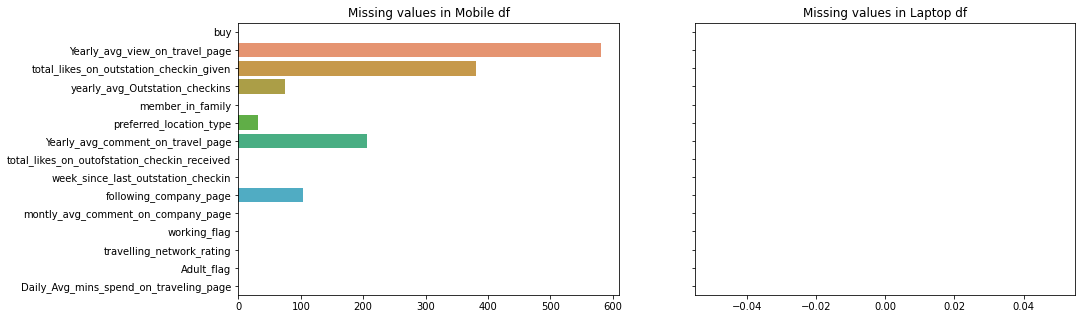

In [ ]:
fig,axes = plt.subplots(1,2,figsize=(15,5),sharey=True)
sns.barplot(x=Mobile.isnull().sum().values,y=Mobile.isnull().sum().index,ax=axes[0])
axes[0].set_title('Missing values in Mobile df')
sns.barplot(x=Laptop.isnull().sum().values,y=Laptop.isnull().sum().index,ax=axes[1])
axes[1].set_title('Missing values in Laptop df');

In [ ]:
#Laptop has just 1100 records
#Mobile has just 10500 records

In [ ]:
Mobile['buy'].value_counts(1)

0    0.847902
1    0.152098
Name: buy, dtype: float64

In [ ]:
Laptop['buy'].value_counts(1)

0    0.750903
1    0.249097
Name: buy, dtype: float64

In [ ]:
cat_col

['buy',
 'yearly_avg_Outstation_checkins',
 'member_in_family',
 'preferred_location_type',
 'following_company_page',
 'working_flag']

In [ ]:
Laptop['yearly_avg_Outstation_checkins']=Laptop['yearly_avg_Outstation_checkins'].astype('int')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
Laptop['member_in_family']=Laptop['member_in_family'].astype('int')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
Laptop['preferred_location_type'].unique()

array(['Beach', 'Historical site', 'Big Cities', 'Trekking', 'Other',
       'Hill Stations'], dtype=object)

In [ ]:
Laptop['working_flag'].unique()

array(['Yes', 'No'], dtype=object)

#### EDA for Laptop data

In [ ]:
Laptop.head()

,buy,Yearly_avg_view_on_travel_page,total_likes_on_outstation_checkin_given,yearly_avg_Outstation_checkins,member_in_family,preferred_location_type,Yearly_avg_comment_on_travel_page,total_likes_on_outofstation_checkin_received,week_since_last_outstation_checkin,following_company_page,montly_avg_comment_on_company_page,working_flag,travelling_network_rating,Adult_flag,Daily_Avg_mins_spend_on_traveling_page
5881,0,379.0,9776.0,8,1,Beach,64.0,5142,1,No,33,Yes,4,1,10
5883,0,255.0,48725.0,3,4,Beach,59.0,2913,1,Yes,19,No,3,0,8
5885,0,250.0,35184.0,2,2,Beach,84.0,3074,0,No,23,No,3,0,8
5888,0,295.0,7572.0,23,3,Beach,48.0,9532,0,No,33,Yes,2,0,10
5906,1,250.0,39379.0,16,1,Beach,80.0,3926,1,Yes,33,Yes,2,0,10


In [ ]:
#1. Boxplot for all the numerical features:

def boxplot_against_buy(var):
  trace1 = go.Box(y=Laptop[var],x=Laptop['buy'])
  data = [trace1]
  layout = go.Layout(title='Distribution of {} against buy variable'.format(var),xaxis={'title':'Buy'})
  fig = go.Figure(data=data,layout=)






